In [15]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt


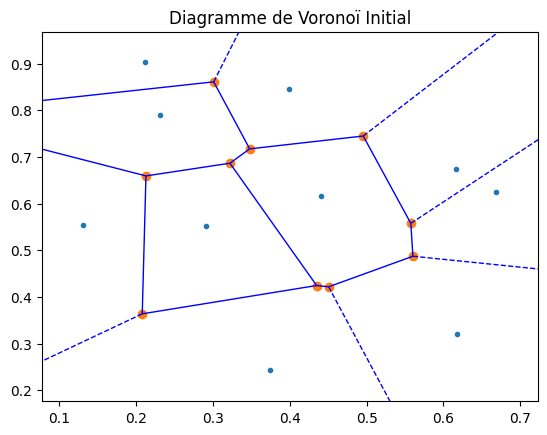

In [16]:
points = np.random.rand(10, 2)  # 10 sites initiaux
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
ax.set_title('Diagramme de Voronoï Initial')
plt.show()


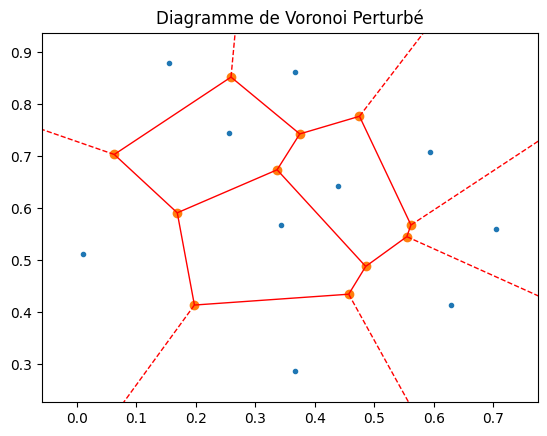

In [17]:
# Étape 3 : Perturbation des positions des sites
perturbation = np.random.normal(scale=0.05, size=points.shape)
points_perturbed = points + perturbation

# Étape 4 : Calcul du nouveau diagramme de Voronoi
voronoi_perturbed = Voronoi(points_perturbed)

# Affichage du nouveau diagramme
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_perturbed, ax=ax, show_vertices=True, line_colors='red')
ax.set_title('Diagramme de Voronoi Perturbé')
plt.show()

initial (11, 2)
perturbed (11, 2)
Différences des sommets: [0.37013897 0.0146522  0.4912496  0.46537133 0.39040105 0.03816808
 0.04476988 0.07686609 0.41574083 0.69350665 0.36012137]


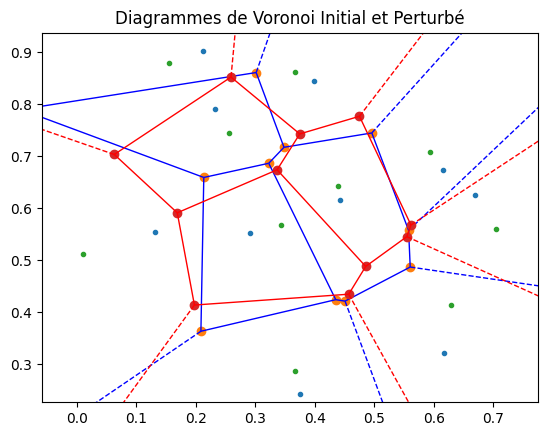

In [18]:
# Étape 5 : Comparaison des sommets
initial_vertices = voronoi_initial.vertices
perturbed_vertices = voronoi_perturbed.vertices


print("initial",initial_vertices.shape)
print("perturbed",perturbed_vertices.shape)

if initial_vertices.shape == perturbed_vertices.shape:
    vertex_differences = np.linalg.norm(initial_vertices - perturbed_vertices, axis=1)
    print("Différences des sommets:", vertex_differences)
else:
    print("Les diagrammes de Voronoi ont un nombre différent de sommets.")

# Affichage des deux diagrammes pour visualisation
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
voronoi_plot_2d(voronoi_perturbed, ax=ax, show_vertices=True, line_colors='red')
ax.set_title('Diagrammes de Voronoi Initial et Perturbé')
plt.show()

APPROCHE ITÉRATIVE DE CORRECTION

----------------------------------------------------------------

In [19]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def cost_function(perturbed_vertices_falt, initial_points, perturbed_points, alpha=1.0):
    #if initial_vertices.shape != perturbed_vertices.shape:
        #return np.inf
    perturbed_vertices = perturbed_vertices_falt.reshape(-1, 2)
    initial_vertices = Voronoi(initial_points).vertices
    # Calculate the total squared distance between corresponding vertices
    vertex_difference = np.sum(np.linalg.norm(initial_vertices - perturbed_vertices, axis=1)**2)
    # Regularization term to keep perturbed points close to initial points
    regularization_term = np.sum(np.linalg.norm(Voronoi(initial_points).vertices -  Voronoi(perturbed_points).vertices, axis=1)**2)
    return vertex_difference + alpha * regularization_term

    #return vertex_difference



initial (14, 2)
perturbed (14, 2)


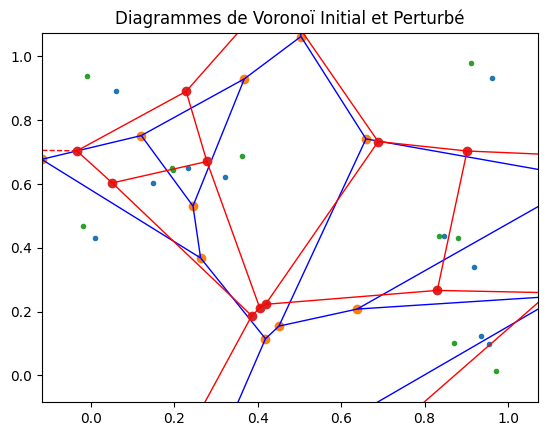

In [20]:
# Initialisation des sites
np.random.seed()  # Pour la reproductibilité
points = np.random.rand(10, 2)  # 10 sites initiaux

# Calcul du diagramme de Voronoï initial
voronoi_initial = Voronoi(points)
initial_vertices = voronoi_initial.vertices


# Perturbation des positions des sites
perturbation = np.random.normal(scale=0.05, size=points.shape)
points_perturbed = points + perturbation

voronoi_perturbed = Voronoi(points_perturbed)
perturbed_vertices = voronoi_perturbed.vertices

print("initial",initial_vertices.shape)
print("perturbed",perturbed_vertices.shape)

# Affichage des diagrammes initial et perturbé
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
voronoi_plot_2d(voronoi_perturbed, ax=ax, show_vertices=True, line_colors='red')
ax.set_title('Diagrammes de Voronoï Initial et Perturbé')
plt.show()


initial (14, 2)
perturbed (14, 2)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36919D+01    |proj g|=  4.56754D+00
Positions mises à jour : [-0.0463694  -0.72942113  2.23508476  0.63463327  0.68213067  0.69783567
  0.91884833  0.2828593   1.24643232  0.31698338  0.58542955  0.30812194
  0.44245327  0.97742504  0.59222433  0.48413542  0.06435832  0.57699678
  0.42215858  0.75215635  0.17831968  0.51824037  0.29786931  0.72639645
  0.32893617  0.30880015  0.37079642  0.2801042 ]

At iterate    1    f=  1.54101D+01    |proj g|=  3.58335D+00


 This problem is unconstrained.


<Figure size 640x480 with 0 Axes>

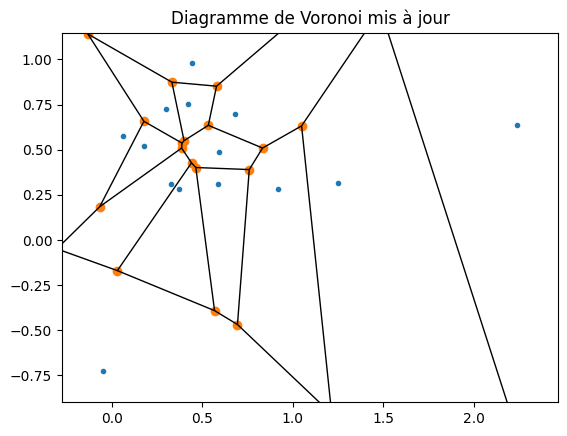

Positions mises à jour :
 [ 0.50376904  1.06225441  0.65960405  0.74137914 -0.1172479   0.67728624
  0.26345561  0.36828773  2.76143994  0.50029531  1.19161704  0.6180308
  0.45097753  0.15465309  0.24072065 -0.42203521  0.41887853  0.11515953
  1.12615681  0.24929314  0.63837928  0.20813506  0.36824983  0.92963426
  0.12143298  0.75183178  0.24519549  0.53110377]
At iterate    2    f=  2.15381D+00    |proj g|=  1.68754D-06


<Figure size 640x480 with 0 Axes>

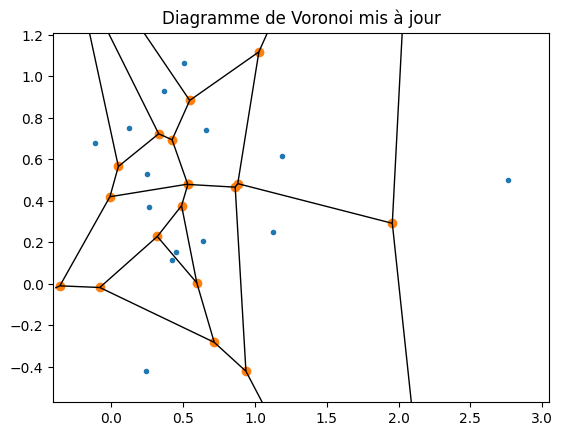


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   28      2      3      1     0     0   1.688D-06   2.154D+00
  F =   2.1538131575604460     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


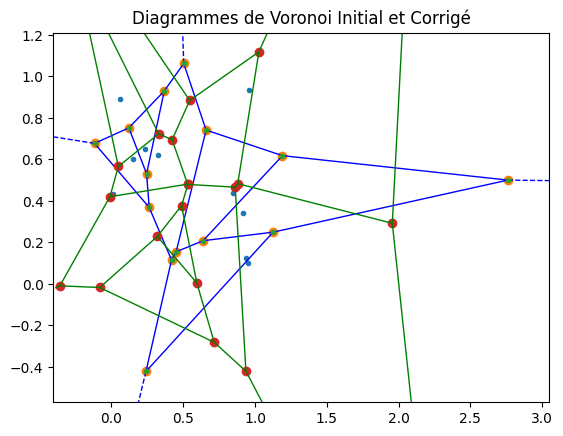

In [21]:
# Fonction de rappel pour la minimisation
def callback(xk):
    print("Positions mises à jour :", xk)
    plt.figure()
    vor = Voronoi(xk.reshape(-1, 2))
    voronoi_plot_2d(vor)
    plt.title("Diagramme de Voronoi mis à jour")
    plt.show()


print("initial",initial_vertices.shape)
print("perturbed",perturbed_vertices.shape)
# Minimisation de la fonction de coût
result = minimize(
    cost_function,
    perturbed_vertices.flatten(),
    args=(voronoi_initial.points, voronoi_perturbed.points, 0.1),
    method='L-BFGS-B',
    callback=callback,
    options={'disp': True}
)

# Résultats finaux
corrected_points = result.x.reshape(-1, 2)
voronoi_corrected = Voronoi(corrected_points)

# Affichage du diagramme de Voronoï corrigé
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
voronoi_plot_2d(voronoi_corrected, ax=ax, show_vertices=True, line_colors='green')
ax.set_title('Diagrammes de Voronoi Initial et Corrigé')
plt.show()